# KDD Fall 2020 - COVID-19 Project

## Team Members
Rohit Alavala (800952197)

Sai Bharadwaj Reddy (801166672)

Amruta Deshmukh (801217189)

Rishant Dutt (801104239)

## Project Introduction

### In this project we are predicting the mortality rate for different counties in each state of the United States of America based on median household income, unemployment rate, poverty rate, white alone %, black alone %, asian alone %, hispanic %.

### Steps followed are:
##### 1. Data Preparation
##### 2. Data Description
##### 3. Data Cleaning and pre-processing
##### 4. Exploratory Data Analysis
##### 5. Evaluation


### Date Preparation

In [1]:
# Importing all the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [2]:
# Importing the required dataset
covid_state_data = pd.read_csv('state_data.csv', index_col=0)
covid_state_data.columns = covid_state_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', '').str.replace('/', '_')

In [3]:
## Data Description

In [4]:
# Checking for the number of rows and columns in a dataset.
covid_state_data.shape

(2959, 21)

In [5]:
# Getting all the information of the dataset like datatype,not null values..
covid_state_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2959 entries, 0 to 2958
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   state                               2959 non-null   object 
 1   fips                                2959 non-null   int64  
 2   county                              2959 non-null   object 
 3   population_2018                     2959 non-null   int64  
 4   median_household_income_2018_$      2959 non-null   int64  
 5   unemployment_rate_2018_             2959 non-null   float64
 6   poverty_2018_                       2959 non-null   float64
 7   confirmed_cases                     2959 non-null   int64  
 8   confirmed_deaths                    2959 non-null   int64  
 9   confirmed_cases_per_100,000_people  2959 non-null   float64
 10  deaths_per_100,000_people           2959 non-null   float64
 11  mortality_rate_                     2959 no

In the dataset State and County has datatype as object. Some columns like FIPS, Median Household Income 2018($), Unemployment Rate 2018, Confirmed Cases, Confirmed Deaths have datatype as integer. and remaining all coumns have the datatype as float.

In [6]:
# Listing all the columns of the dataset
covid_state_data.columns

Index(['state', 'fips', 'county', 'population_2018',
       'median_household_income_2018_$', 'unemployment_rate_2018_',
       'poverty_2018_', 'confirmed_cases', 'confirmed_deaths',
       'confirmed_cases_per_100,000_people', 'deaths_per_100,000_people',
       'mortality_rate_', 'white_alone_', 'black_alone_',
       'native_american_alone_', 'asian_alone_', 'hispanic_',
       'less_than_a_high_school_diploma_', 'only_a_high_school_diploma_',
       'some_college_associate's_degree_', 'bachelor's_degree_or_higher_'],
      dtype='object')

In [7]:
# Counting number of states and number of counties in the dataset
number_of_states = pd.unique(covid_state_data['state'])
number_of_counties = pd.unique(covid_state_data['county'])
print("Number of States :",len(number_of_states))
print("Number of Counties :",len(number_of_counties))


Number of States : 51
Number of Counties : 1741


In [8]:
# Checking the statistical summary of the dataset 
covid_state_data.describe()

,fips,population_2018,median_household_income_2018_$,unemployment_rate_2018_,poverty_2018_,confirmed_cases,confirmed_deaths,"confirmed_cases_per_100,000_people","deaths_per_100,000_people",mortality_rate_,white_alone_,black_alone_,native_american_alone_,asian_alone_,hispanic_,less_than_a_high_school_diploma_,only_a_high_school_diploma_,some_college_associate's_degree_,bachelor's_degree_or_higher_
count,2959.000000,2.959000e+03,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000
mean,30267.689084,1.076076e+05,52907.030416,4.138560,15.220953,612.245015,35.390673,345.211504,13.872305,3.458911,84.229755,9.784947,2.187493,1.571278,9.614081,13.531869,34.284589,30.560088,21.622237
std,15216.579589,3.355405e+05,14025.941509,1.442719,6.174689,4647.469021,425.977048,672.040361,36.845776,5.261766,16.255690,14.710205,7.267710,2.783350,13.748744,6.244929,7.212705,5.055190,9.545845
min,1001.000000,4.620000e+02,25385.000000,1.300000,2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,5.325320,0.000000,0.000000,0.000000,0.610451,1.200000,5.500000,11.400000,5.400000
25%,18142.000000,1.269400e+04,43665.000000,3.200000,10.800000,12.000000,0.000000,66.270542,0.000000,0.000000,78.903678,0.935071,0.377409,0.474314,2.403604,8.850000,29.900000,27.200000,14.900000
50%,29111.000000,2.820400e+04,50587.000000,3.900000,14.200000,47.000000,1.000000,153.771979,2.899475,1.685393,90.911038,2.855236,0.615064,0.758277,4.430390,12.200000,34.600000,30.500000,19.200000
75%,45058.000000,7.313150e+04,59011.500000,4.800000,18.400000,211.000000,7.000000,372.358983,12.881857,5.263158,95.414974,11.683090,1.269921,1.478203,9.998449,17.400000,39.300000,34.000000,25.800000
max,56045.000000,1.007391e+07,140382.000000,18.900000,54.000000,204377.000000,21649.000000,12652.950240,1328.929962,100.000000,99.043785,86.069762,92.515200,42.952310,96.359551,48.500000,55.600000,48.000000,78.500000


In [9]:
# Printing first 10 rows of the dataset
covid_state_data.head(10)

,state,fips,county,population_2018,median_household_income_2018_$,unemployment_rate_2018_,poverty_2018_,confirmed_cases,confirmed_deaths,"confirmed_cases_per_100,000_people",...,mortality_rate_,white_alone_,black_alone_,native_american_alone_,asian_alone_,hispanic_,less_than_a_high_school_diploma_,only_a_high_school_diploma_,some_college_associate's_degree_,bachelor's_degree_or_higher_
0,Alabama,1001,Autauga,55533,59338,3.6,13.8,239,5,430.374732,...,2.092050,76.725239,19.630942,0.480207,1.224798,2.965774,11.3,32.6,28.4,27.7
1,Alabama,1003,Baldwin,217855,57588,3.6,9.8,292,9,134.034105,...,3.082192,87.285228,8.940382,0.772399,1.150343,4.646779,9.7,27.6,31.3,31.3
2,Alabama,1005,Barbour,24872,34382,5.1,30.9,175,1,703.602445,...,0.571429,49.069571,48.398376,0.659137,0.454162,4.276355,27.0,35.7,25.1,12.2
3,Alabama,1007,Bibb,22367,46064,3.9,21.8,76,1,339.786292,...,1.315789,76.834821,21.294643,0.437500,0.236607,2.625000,16.8,47.3,24.4,11.5
4,Alabama,1009,Blount,57771,50412,3.5,13.2,63,1,109.051254,...,1.587302,95.878285,1.642462,0.653527,0.319848,9.571231,19.8,34.0,33.5,12.6
5,Alabama,1011,Bullock,10174,29267,4.6,42.5,213,6,2093.571850,...,2.816901,26.247781,70.704281,0.838430,0.187414,7.960150,24.8,39.7,22.3,13.3
6,Alabama,1013,Butler,19631,37365,4.7,24.5,416,18,2119.097346,...,4.326923,52.251016,44.913618,0.376016,1.316057,1.509146,15.4,43.9,24.6,16.1
7,Alabama,1015,Calhoun,114331,45400,4.6,19.5,165,3,144.317814,...,1.818182,75.278490,21.135487,0.539916,0.964324,3.910673,15.9,32.4,33.7,18.0
8,Alabama,1017,Chambers,33600,39917,3.8,18.7,358,26,1065.476190,...,7.262570,57.063811,40.000000,0.306411,1.326789,2.561357,18.6,38.4,29.7,13.2
9,Alabama,1019,Cherokee,26014,42132,3.5,16.3,38,3,146.075190,...,7.894737,93.027812,4.260141,0.660725,0.338045,1.621082,19.8,38.3,29.0,12.9


### Data Cleaning and Pre-processing

#### Checking if any duplicate rows present in the data

In [10]:
duplicate_df = covid_state_data[covid_state_data.duplicated()]
print('Duplicate Rows: ', duplicate_df.shape[0])

Duplicate Rows:  0


There are no duplicate rows in the dataset.

#### Looking for the missing values in the dataset

In [11]:
# Check for nulls in the dataset and count for the number of null values
covid_state_data.isna().sum()

state                                 0
fips                                  0
county                                0
population_2018                       0
median_household_income_2018_$        0
unemployment_rate_2018_               0
poverty_2018_                         0
confirmed_cases                       0
confirmed_deaths                      0
confirmed_cases_per_100,000_people    0
deaths_per_100,000_people             0
mortality_rate_                       0
white_alone_                          0
black_alone_                          0
native_american_alone_                0
asian_alone_                          0
hispanic_                             0
less_than_a_high_school_diploma_      0
only_a_high_school_diploma_           0
some_college_associate's_degree_      0
bachelor's_degree_or_higher_          0
dtype: int64

There is no missing data in the dataset.

###### Data Reduction - Dropping the column FIPS because it does not specify much details

In [12]:
covid_state_data = covid_state_data.drop(['fips'], axis=1)
# Listing all the columns of the dataset after removing columns - Unnamed:0 and FIPS
covid_state_data.columns

Index(['state', 'county', 'population_2018', 'median_household_income_2018_$',
       'unemployment_rate_2018_', 'poverty_2018_', 'confirmed_cases',
       'confirmed_deaths', 'confirmed_cases_per_100,000_people',
       'deaths_per_100,000_people', 'mortality_rate_', 'white_alone_',
       'black_alone_', 'native_american_alone_', 'asian_alone_', 'hispanic_',
       'less_than_a_high_school_diploma_', 'only_a_high_school_diploma_',
       'some_college_associate's_degree_', 'bachelor's_degree_or_higher_'],
      dtype='object')

#### Data Reduction - Rounding off the values to 3 digits

In [13]:
# Rounding off the data values of numeric fields to 3 digits.
covid_state_data = np.round(covid_state_data, decimals=3)
covid_state_data.head()

,state,county,population_2018,median_household_income_2018_$,unemployment_rate_2018_,poverty_2018_,confirmed_cases,confirmed_deaths,"confirmed_cases_per_100,000_people","deaths_per_100,000_people",mortality_rate_,white_alone_,black_alone_,native_american_alone_,asian_alone_,hispanic_,less_than_a_high_school_diploma_,only_a_high_school_diploma_,some_college_associate's_degree_,bachelor's_degree_or_higher_
0,Alabama,Autauga,55533,59338,3.6,13.8,239,5,430.375,9.004,2.092,76.725,19.631,0.480,1.225,2.966,11.3,32.6,28.4,27.7
1,Alabama,Baldwin,217855,57588,3.6,9.8,292,9,134.034,4.131,3.082,87.285,8.940,0.772,1.150,4.647,9.7,27.6,31.3,31.3
2,Alabama,Barbour,24872,34382,5.1,30.9,175,1,703.602,4.021,0.571,49.070,48.398,0.659,0.454,4.276,27.0,35.7,25.1,12.2
3,Alabama,Bibb,22367,46064,3.9,21.8,76,1,339.786,4.471,1.316,76.835,21.295,0.438,0.237,2.625,16.8,47.3,24.4,11.5
4,Alabama,Blount,57771,50412,3.5,13.2,63,1,109.051,1.731,1.587,95.878,1.642,0.654,0.320,9.571,19.8,34.0,33.5,12.6


### Exploratory Data Analysis

#### Correlation Matrix for the Dataset
###### The following correlation table shows the correlation among all the features.

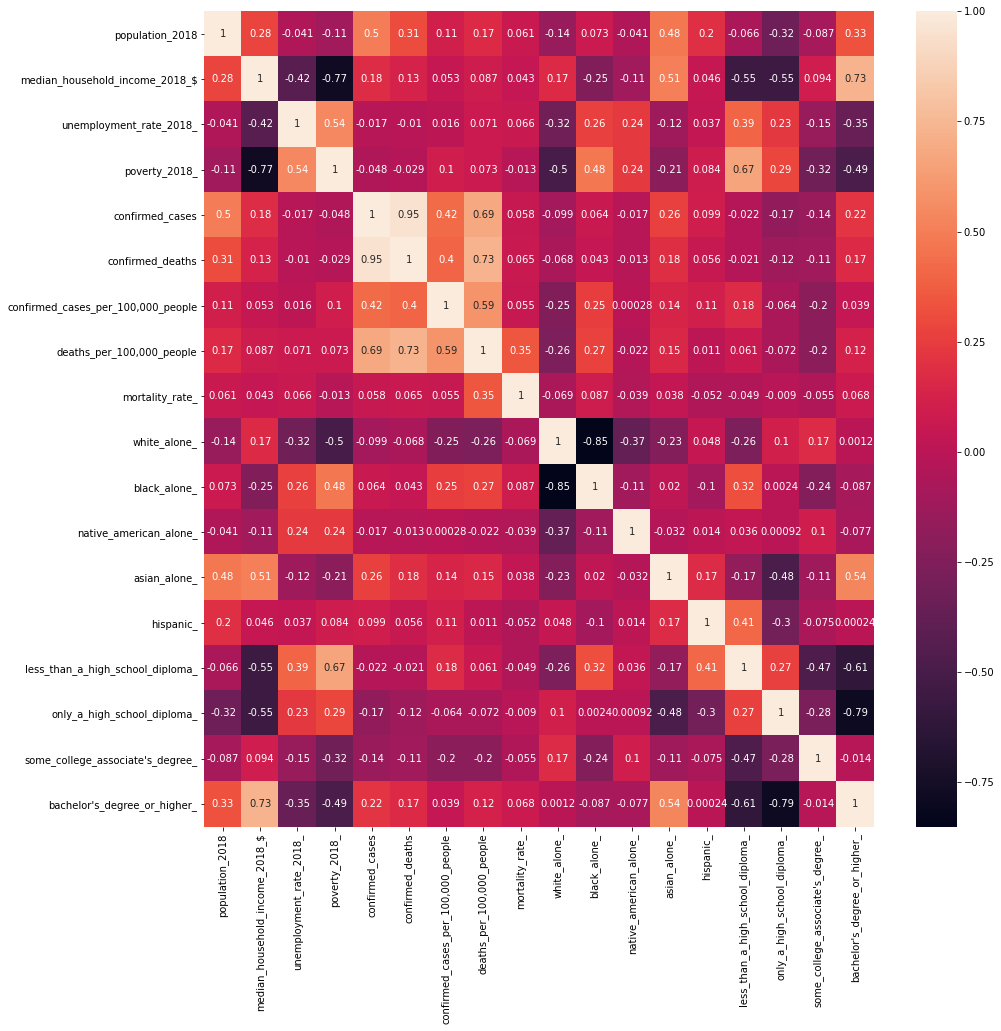

In [14]:
correlation=covid_state_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation,annot=True)
plt.show()

### There are lots of insights about the data from the above correlation matrix.

1) Poverty of the county is negatively correlated to the median household income of the county i.e; Higher the median household income, lower the poverty in that county.

2) Counties with higher "white only" population has lower "black only" population and vice-versa.

3) Counties with higher "white only" population is negatively coorelated to poverty, which is the complete opposite in the case of counties with "black only" population.

4) Unemployment is Positively correlated to the poverty i.e; higher the unemployment higher the poverty.

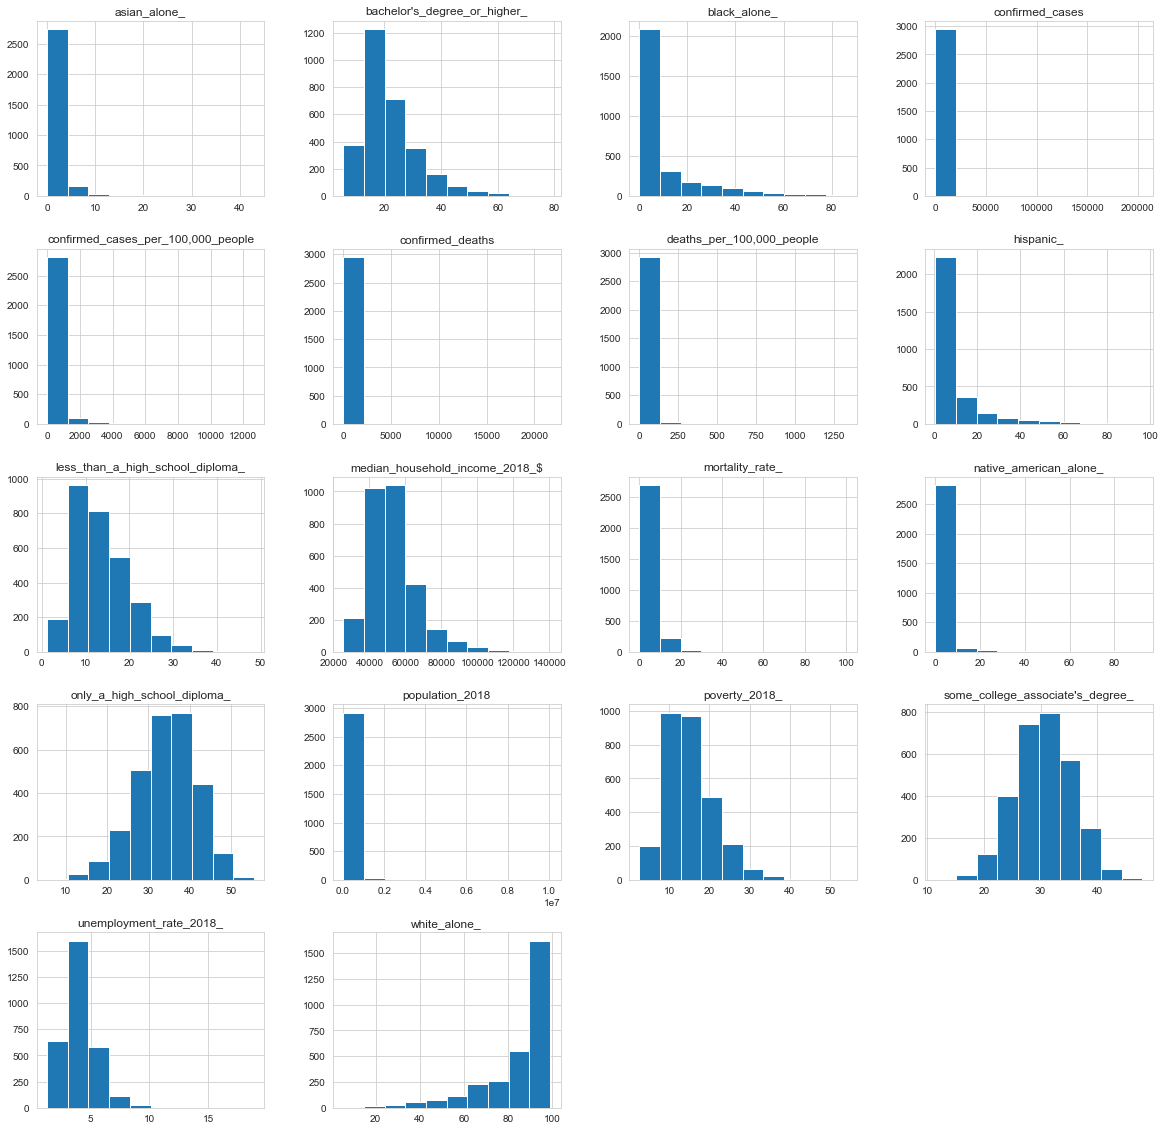

In [15]:
sns.set_style("whitegrid");
num=covid_state_data.select_dtypes(include=['int64','float64'])
num.hist(figsize=(20, 20))
plt.show() 

#### Lets see if there are any outliers across various columns

(To have an understanding of what we are dealing with)

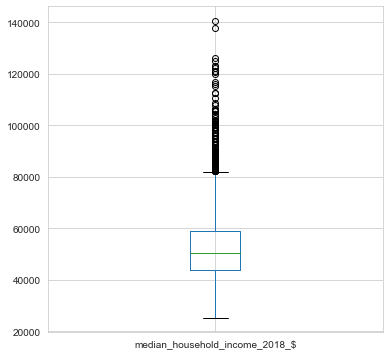

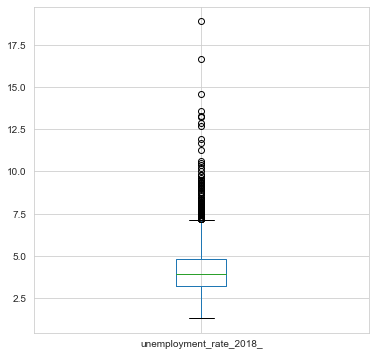

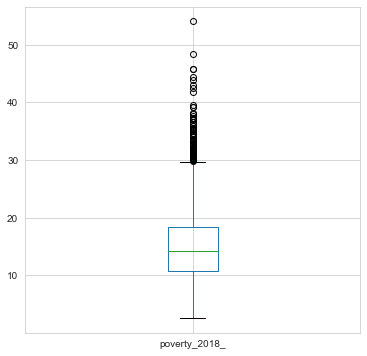

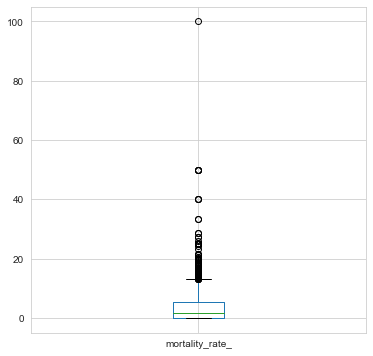

In [16]:
few_columns = ['median_household_income_2018_$',
       'unemployment_rate_2018_', 'poverty_2018_', 'mortality_rate_']
for i in few_columns:
    covid_state_data[str(i)].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(6,6))
    plt.show() 

An outlier is a data point or value that differs considerably from all or most other data in a dataset. These won't make the model fail

There are outliers across all the columns which are plotted.

#### Lets look at the distribution on various columns

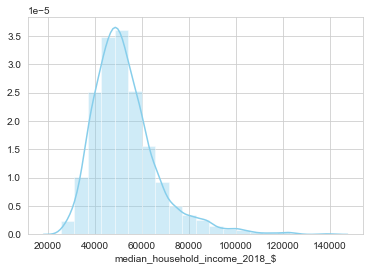

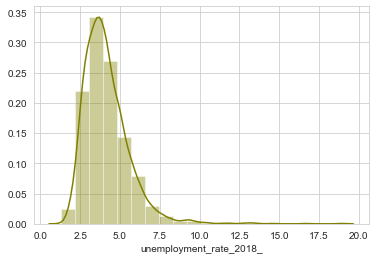

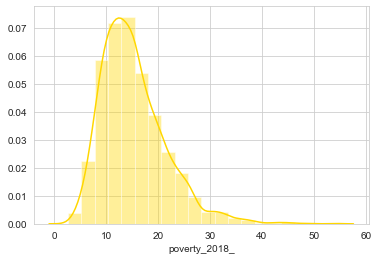

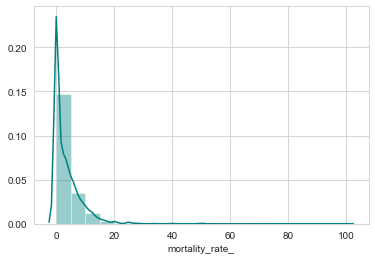

In [17]:
colors = ['skyblue', 'olive', 'gold', 'teal']
for i, j in enumerate(few_columns):
    sns.distplot( covid_state_data[str(j)], bins=20, color = str(colors[i]) )
    plt.show()

##### Lets look at counties with highest Mortality rate

In [18]:
county_mortality = covid_state_data.sort_values(by=['mortality_rate_'])
county_mortality = county_mortality[county_mortality['mortality_rate_'] != 0]
low_mortality = county_mortality.head(15)
high_mortality = county_mortality.tail(15)


In [19]:
high_mortality

,state,county,population_2018,median_household_income_2018_$,unemployment_rate_2018_,poverty_2018_,confirmed_cases,confirmed_deaths,"confirmed_cases_per_100,000_people","deaths_per_100,000_people",mortality_rate_,white_alone_,black_alone_,native_american_alone_,asian_alone_,hispanic_,less_than_a_high_school_diploma_,only_a_high_school_diploma_,some_college_associate's_degree_,bachelor's_degree_or_higher_
237,Colorado,Chaffee,20041,56168,2.6,10.9,77,20,384.212,99.795,25.974,93.948,1.738,1.628,0.869,10.126,7.1,26.7,32.6,33.5
1346,Minnesota,Wilkin,6244,61387,3.0,9.4,11,3,176.169,48.046,27.273,95.539,0.640,1.807,0.432,3.102,6.1,29.7,40.7,23.5
1146,Maine,Waldo,39657,49482,3.4,13.7,51,14,128.603,35.303,27.451,96.546,0.627,0.496,0.708,1.499,7.6,32.6,30.3,29.6
2916,Wisconsin,Richland,17397,53050,2.6,14.3,14,4,80.474,22.992,28.571,96.829,0.794,0.478,0.783,2.440,10.0,40.9,30.2,18.9
2719,Virginia,Scott,21672,40161,3.3,18.5,7,2,32.300,9.228,28.571,97.697,0.822,0.288,0.190,1.426,18.8,37.2,29.6,14.4
2532,Texas,Martin,5681,56484,2.5,13.6,3,1,52.808,17.603,33.333,93.847,2.990,1.373,0.521,47.436,22.9,31.1,25.6,20.4
2867,Wisconsin,Bayfield,15026,53637,4.9,14.2,3,1,19.965,6.655,33.333,85.414,0.671,10.391,0.538,2.041,5.1,28.8,35.6,30.5
1205,Michigan,Dickinson,25371,52348,3.8,10.8,5,2,19.708,7.883,40.000,96.364,0.512,0.977,0.599,1.631,5.2,33.8,34.5,26.5
873,Kansas,Clay,8003,52681,3.1,10.7,5,2,62.477,24.991,40.000,95.986,0.938,0.638,0.525,2.513,7.0,29.8,36.0,27.2
2026,Oklahoma,Cotton,5820,43386,3.1,16.2,5,2,85.911,34.364,40.000,81.042,2.372,10.042,0.294,8.293,14.2,43.4,29.3,13.2


In [20]:
low_mortality

,state,county,population_2018,median_household_income_2018_$,unemployment_rate_2018_,poverty_2018_,confirmed_cases,confirmed_deaths,"confirmed_cases_per_100,000_people","deaths_per_100,000_people",mortality_rate_,white_alone_,black_alone_,native_american_alone_,asian_alone_,hispanic_,less_than_a_high_school_diploma_,only_a_high_school_diploma_,some_college_associate's_degree_,bachelor's_degree_or_higher_
771,Iowa,Buena Vista,19826,52683,2.2,10.2,852,1,4297.387,5.044,0.117,82.922,3.542,0.619,9.681,25.984,22.2,29.5,28.7,19.6
158,Arkansas,St. Francis,25509,33257,5.0,35.6,682,1,2673.566,3.920,0.147,43.980,52.942,0.786,0.637,5.444,19.4,38.8,31.2,10.6
2295,Tennessee,Bledsoe,14883,40195,6.0,26.7,609,1,4091.917,6.719,0.164,90.613,7.137,0.590,0.271,2.453,25.1,38.7,23.4,12.9
1623,Nebraska,Platte,33287,63656,2.8,8.5,603,1,1811.518,3.004,0.166,95.102,1.076,1.322,1.202,19.815,11.3,30.7,35.8,22.2
1297,Minnesota,Kandiyohi,42910,60579,3.0,11.5,504,1,1174.551,2.330,0.198,90.883,6.170,0.544,1.085,12.293,11.5,25.8,39.3,23.4
1627,Nebraska,Saline,14336,54569,3.1,12.4,506,1,3529.576,6.975,0.198,91.115,1.631,1.833,3.275,25.882,15.7,35.2,34.7,14.3
1585,Nebraska,Dodge,36725,51682,2.9,9.8,487,1,1326.072,2.723,0.205,94.371,1.288,1.538,0.747,13.367,10.7,36.3,34.5,18.6
936,Kansas,Seward,21902,50671,3.2,15.1,883,2,4031.595,9.132,0.227,88.182,5.032,1.680,2.994,61.988,31.8,30.6,26.4,11.1
1440,Missouri,Buchanan,88163,52506,2.9,15.6,719,2,815.535,2.269,0.278,88.475,5.956,0.735,1.618,6.886,11.8,37.0,30.5,20.7
2376,Tennessee,Trousdale,11033,49280,3.3,18.6,1396,4,12652.950,36.255,0.287,85.661,11.478,0.599,0.445,2.443,19.8,34.8,28.5,16.8


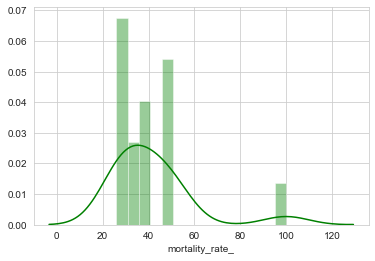

In [21]:
sns.distplot(a=high_mortality['mortality_rate_'] ,bins=15, color='Green')
plt.show()
#Below we can see the distribution of Mortality rate for Top counties.

##### Lets plot a heat_map for correlation in high_mortality and low_mortality dataframe

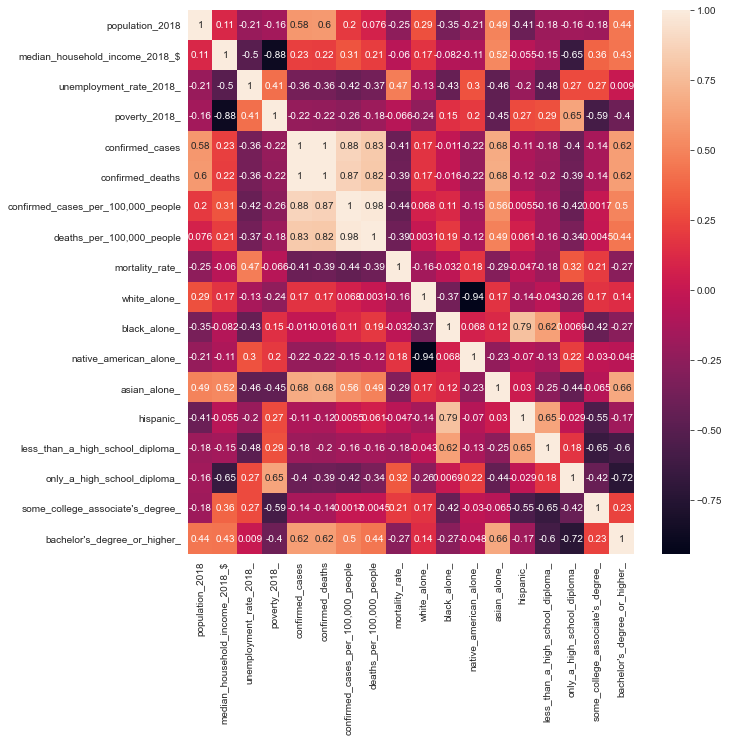

In [22]:
plt.figure(figsize=(10,10)) 
sns.heatmap(high_mortality.corr(), annot = True)
plt.show()

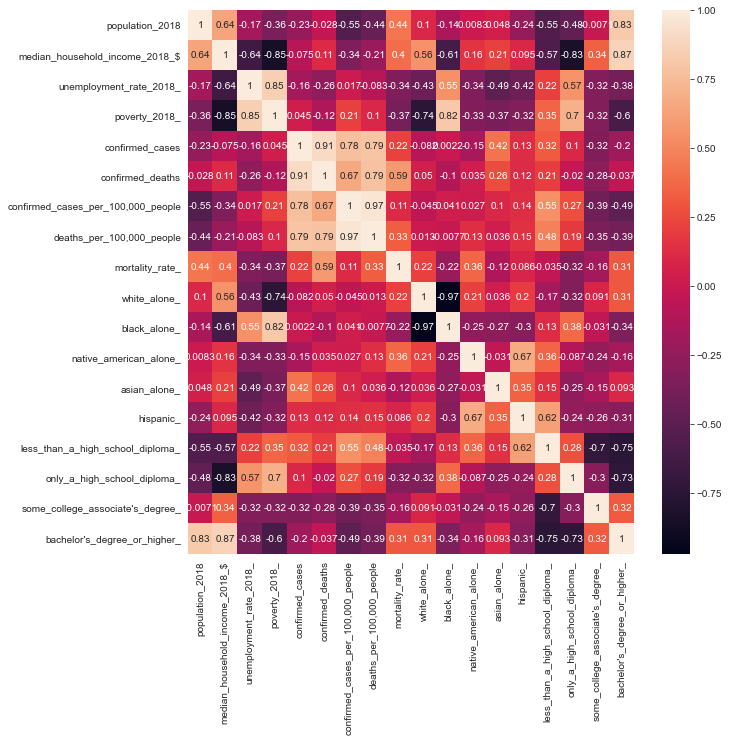

In [23]:
plt.figure(figsize=(10,10)) 
sns.heatmap(low_mortality.corr(), annot = True)
plt.show()

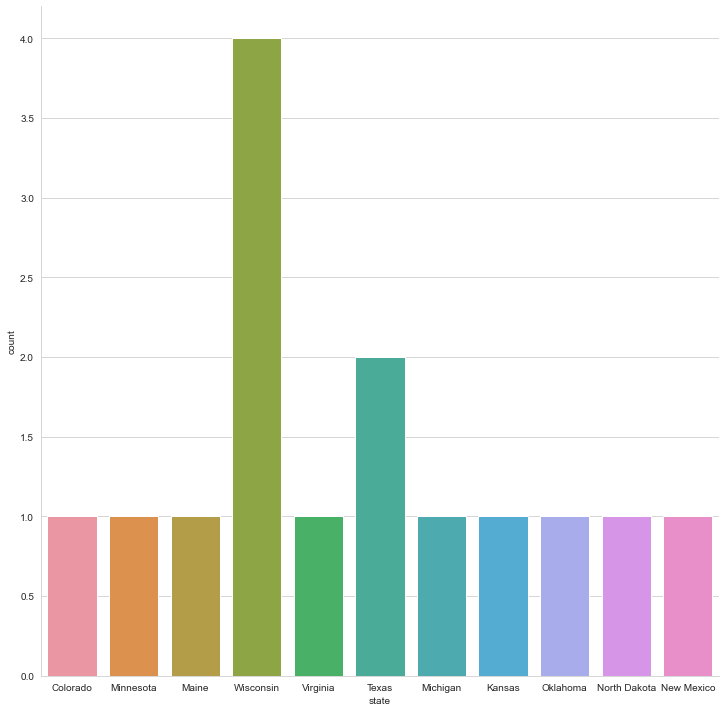

In [24]:
sns.catplot(x="state", kind = 'count',data= high_mortality , size = 10) 
plt.show()

From the above graph we can see that,
Wisconsin and Texas have 4, 2 counties respectively in the top 15 counties with high mortality rate

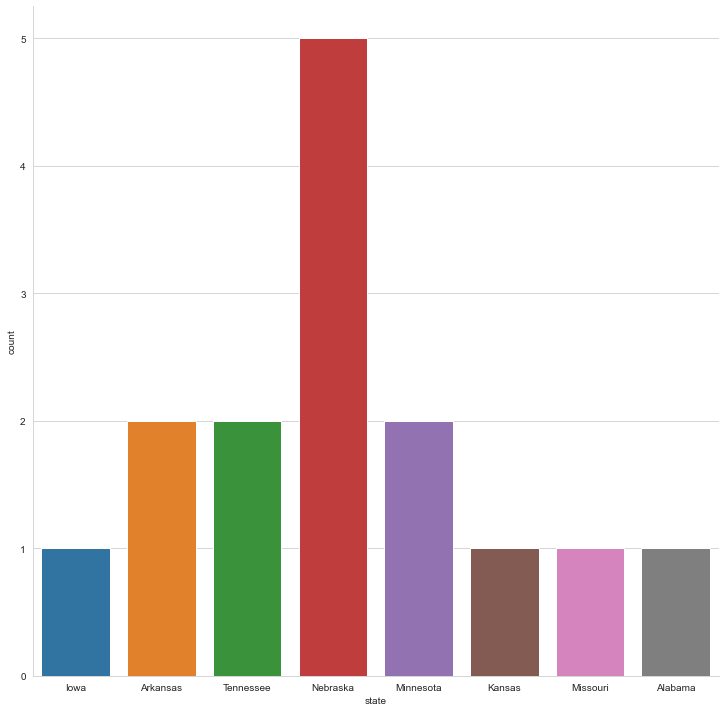

In [25]:
sns.catplot(x="state", kind = 'count',data= low_mortality , size = 10)
plt.show()

From the above graph we can see that,
Nebraska has 5 counties with the lowest mortality rate in the USA

## Modeling

In [26]:
covid_state_data.head(5)

,state,county,population_2018,median_household_income_2018_$,unemployment_rate_2018_,poverty_2018_,confirmed_cases,confirmed_deaths,"confirmed_cases_per_100,000_people","deaths_per_100,000_people",mortality_rate_,white_alone_,black_alone_,native_american_alone_,asian_alone_,hispanic_,less_than_a_high_school_diploma_,only_a_high_school_diploma_,some_college_associate's_degree_,bachelor's_degree_or_higher_
0,Alabama,Autauga,55533,59338,3.6,13.8,239,5,430.375,9.004,2.092,76.725,19.631,0.480,1.225,2.966,11.3,32.6,28.4,27.7
1,Alabama,Baldwin,217855,57588,3.6,9.8,292,9,134.034,4.131,3.082,87.285,8.940,0.772,1.150,4.647,9.7,27.6,31.3,31.3
2,Alabama,Barbour,24872,34382,5.1,30.9,175,1,703.602,4.021,0.571,49.070,48.398,0.659,0.454,4.276,27.0,35.7,25.1,12.2
3,Alabama,Bibb,22367,46064,3.9,21.8,76,1,339.786,4.471,1.316,76.835,21.295,0.438,0.237,2.625,16.8,47.3,24.4,11.5
4,Alabama,Blount,57771,50412,3.5,13.2,63,1,109.051,1.731,1.587,95.878,1.642,0.654,0.320,9.571,19.8,34.0,33.5,12.6


In [27]:
for col in covid_state_data.columns: 
    print(col) 

state
county
population_2018
median_household_income_2018_$
unemployment_rate_2018_
poverty_2018_
confirmed_cases
confirmed_deaths
confirmed_cases_per_100,000_people
deaths_per_100,000_people
mortality_rate_
white_alone_
black_alone_
native_american_alone_
asian_alone_
hispanic_
less_than_a_high_school_diploma_
only_a_high_school_diploma_
some_college_associate's_degree_
bachelor's_degree_or_higher_


In [28]:
Y = covid_state_data['deaths_per_100,000_people']
Y

0       9.004
1       4.131
2       4.021
3       4.471
4       1.731
        ...  
2954    0.000
2955    0.000
2956    0.000
2957    0.000
2958    0.000
Name: deaths_per_100,000_people, Length: 2959, dtype: float64

In [29]:
X = covid_state_data.drop(['state','county', 'deaths_per_100,000_people'], axis=1)
X

,population_2018,median_household_income_2018_$,unemployment_rate_2018_,poverty_2018_,confirmed_cases,confirmed_deaths,"confirmed_cases_per_100,000_people",mortality_rate_,white_alone_,black_alone_,native_american_alone_,asian_alone_,hispanic_,less_than_a_high_school_diploma_,only_a_high_school_diploma_,some_college_associate's_degree_,bachelor's_degree_or_higher_
0,55533,59338,3.6,13.8,239,5,430.375,2.092,76.725,19.631,0.480,1.225,2.966,11.3,32.6,28.4,27.7
1,217855,57588,3.6,9.8,292,9,134.034,3.082,87.285,8.940,0.772,1.150,4.647,9.7,27.6,31.3,31.3
2,24872,34382,5.1,30.9,175,1,703.602,0.571,49.070,48.398,0.659,0.454,4.276,27.0,35.7,25.1,12.2
3,22367,46064,3.9,21.8,76,1,339.786,1.316,76.835,21.295,0.438,0.237,2.625,16.8,47.3,24.4,11.5
4,57771,50412,3.5,13.2,63,1,109.051,1.587,95.878,1.642,0.654,0.320,9.571,19.8,34.0,33.5,12.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,42858,73315,4.0,8.4,30,0,69.999,0.000,93.835,1.375,1.545,1.010,16.083,9.0,33.3,35.7,22.0
2955,23269,99087,2.9,6.3,100,0,429.756,0.000,95.191,0.758,0.914,1.412,14.878,5.6,13.2,23.8,57.4
2956,20292,63401,4.2,10.0,13,0,64.065,0.000,95.354,0.828,1.419,0.473,9.237,7.2,40.1,37.2,15.4
2957,7877,55190,4.1,11.9,37,0,469.722,0.000,94.483,0.507,1.814,0.824,14.052,10.4,30.3,37.7,21.5


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
X_train.shape, y_train.shape

((2367, 17), (2367,))

In [32]:
X_test.shape, y_test.shape

((592, 17), (592,))

In [33]:
model = RandomForestRegressor(max_depth=5, random_state=42)

In [34]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [35]:
s1 = model.score(X_test, y_test)
s1

0.9438305165600636

In [36]:
reg = ExtraTreesRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

ExtraTreesRegressor(random_state=42)

In [37]:
s2 = reg.score(X_test, y_test)
s2

0.9825545430703864

In [38]:
reg = GradientBoostingRegressor(random_state=42)
reg.fit(X_train, y_train)
s3 = reg.score(X_test, y_test)
s3

0.9736877639307829

In [39]:
est = HistGradientBoostingRegressor()
est.fit(X_train, y_train)
s4 = est.score(X_test, y_test)
s4

0.9695519472622856

In [40]:
clf = Ridge(alpha=1.0, random_state=42)
clf.fit(X_train, y_train)
s5 = clf.score(X_test, y_test)
s5

0.6675359651701538

In [41]:
regr = ElasticNet(random_state=42)
regr.fit(X_train, y_train)
s6 = regr.score(X_test, y_test)
s6

0.6695435949810384

In [42]:
names= ['RandomForestRegressor', 'ExtraTreesRegressor', 'RadientBoostingRegressor', 'HistGradientBoostingRegressor',
        'Ridge', 'ElasticNet']
scores= [s1, s2, s3, s4, s5, s6]

In [43]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,RandomForestRegressor,0.943831
1,ExtraTreesRegressor,0.982555
2,radientBoostingRegressor,0.973688
3,HistGradientBoostingRegressor,0.969552
4,Ridge,0.667536
5,ElasticNet,0.669544


In [44]:
cm = sns.light_palette("red", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,RandomForestRegressor,0.943831
1,ExtraTreesRegressor,0.982555
2,radientBoostingRegressor,0.973688
3,HistGradientBoostingRegressor,0.969552
4,Ridge,0.667536
5,ElasticNet,0.669544


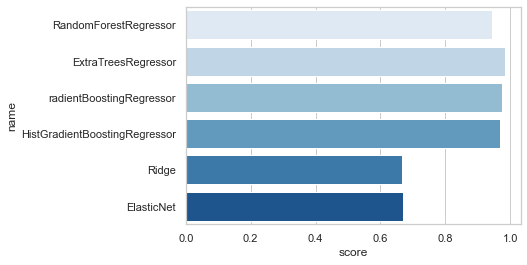

In [45]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df, palette='Blues')

For our modeling, we decided to go with 6 models and not rely on only one model. The 6 models that we have used for our project are RandomForestRegressor, ExtraTreesRegressor, RadientBoostingRegressor, HistGradientBoostingRegressor, Ridge & finally ElasticNet. A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging. Bagging, in the Random Forest method, involves training each decision tree on a different data sample where sampling is done with replacement. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees. An extra-trees regressor implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. Gradient Boosting for regressor builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function. Histogram-based Gradient Boosting Regression Tree. This estimator is much faster than GradientBoostingRegressor for big datasets (n_samples >= 10 000). This estimator has native support for missing values (NaNs). During training, the tree grower learns at each split point whether samples with missing values should go to the left or right child, based on the potential gain. When predicting, samples with missing values are assigned to the left or right child consequently. If no missing values were encountered for a given feature during training, then samples with missing values are mapped to whichever child has the most samples. The Ridge model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)). Lastly, the ElasitcNet model is a regularised regression method that linearly combines both penalties i.e. L1 and L2 of the Lasso and Ridge regression methods. It is useful when there are multiple correlated features. The difference between Lass and Elastic-Net lies in the fact that Lasso is likely to pick one of these features at random while elastic-net is likely to pick both at once.We used 'deaths_per_100,000_people' as our target column as per our instructors feedback instead of the 'mortality_rate_'. Making this changed helped the models perform better, espeically Ridge & ElasticNet models. As you can see from the above graph, ExtraTreesRegressor gave us the best accuracy score followed close by RadientBoostingRegressor, HistGradientBoostingRegressor, RandomForestRegressor, ElasticNet & Ridge. 

## Evaluation

We used the coefficient of determination, R^2, of the predictions to score each prediction. The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

Given the relatively small sample size of our dataset, coming in at 2959 data samples, we believe that the time each model takes to fit the training data is irrelevant. Focussing solely on performance, the aforementioned coefficient of determination seems to be a perfectly valid estimator of a model's performance, all by itself.

Now, amongst the 6 models tested here, the simpler, linear, models do not score particularly well, averaging a score of 0.6 approximately, this tells us that the data maybe too complex and might require more models that are better equiped to deal with that complexity, thus we selected 4 models namely, RandomForestRegressor, ExtraTreesRegressor, RadientBoostingRegressor, and HistGradientBoostingRegressor.

These models outperformed the linear models by a lot, and gave us a very satisfactory score of about 0.96 on average. Amongst these models the ExtraTreesRegressor performed the best with a score close to 0.99, nearly perfect. Hence, in conclusion of this section, we pick the ExtraTreesRegressor as the model of choice to predict, the deaths per 100k people, for the given dataset.

## Summary 

The World Health Organisation (WHO) has declared the coronavirus disease 2019 (COVID-19) a pandemic. A global coordinated effort is needed to stop the further spread of the virus. A pandemic is defined as “occurring over a wide geographic area and affecting an exceptionally high proportion of the population.” Our dataset state_data has information like median household income, unemployment rate, poverty rate, white alone %, black alone %, asian alone %, hispanic %, etc about all states in the United States of America.
The dataset was impure hence we performed data cleaning and preprocessing before performing any visualization on that. In data cleaning we looked for some missing values as well as for duplicate values. We have also performed data reduction by removing the unnecessary cloumns from the dataset.
In the next step we performed exploratory data analysis on the data. We represented the data in different plots and visualized the data. Going forward we performed different modeling on the data to predict the death rate. The modeling techniques like RandomForestRegressor,ExtraTreesRegressor,RadientBoostingRegressor,HistGradientBoostingRegressor,Ridge,ElasticNet are used.

##  Deployment

1. Create a repository on github.
2. Create a jupyter notebook and export it as an html file
3. Add, Commit, & Push changes to GitHub
4. Enable The Project Website

## Discussion

By Fitting the Dataset with different regression models we were able to estimate "the number of deaths per 100000 people", in each county very efficiently. 'Extra Trees Regressor' happens to be the best regression model with a R-squared score of 0.98. 
R-squared gives you the percentage variation in y explained by x-variables. The range is 0 to 1 (i.e. 0% to 100% of the variation in y can be explained by the x-variables).


## Future work

We have done our project on all the states of United states of America. This can be extended to perform globally. In future, we can consider all the states of other countries of the world as well.
